<a href="https://colab.research.google.com/github/yolo4123/Mini/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/agridata_202207142054.csv')
# Drop specific columns
columns_to_drop = ['state_name', 'district_name', 'market_name','variety','group']  # Replace with actual column names
df = df.drop(columns=columns_to_drop)
# Alternatively, you can drop columns by index:
# df = df.drop(df.columns[[0, 2, 4]], axis=1)  # Drops the 1st, 3rd, and 5th columns
# Display the columns after dropping
print(df)
#print("Columns in the dataset after dropping:\n", df.columns)
df.to_csv('/content/agridata_updated1.csv', index=False)

      arrival_tonnes  min_price_rs_quintal  max_price_rs_quintal  \
0               1.50                  4000                  7500   
1               0.45                  2500                  3000   
2               3.00                  2300                  2300   
3               0.40                  2300                  2300   
4               1.50                  4000                  7500   
...              ...                   ...                   ...   
3435           13.00                  2400                  2500   
3436            4.90                  1800                  2300   
3437            0.30                  5000                  5500   
3438            3.00                  2800                  2800   
3439            0.30                   280                  2800   

      modal_price_rs_quintal reported_date commodity_name  
0                       5750    2022-07-13    Ambada Seed  
1                       2800    2022-07-13    Ambada Seed  
2  

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Excel dataset
file_path = '/content/agridata_updated1.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Step 2: Select the column to encode (example: 'Category')
column_to_encode = 'commodity_name'  # replace with the column you want to encode

# Step 3: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 4: Apply the label encoding to the chosen column
df[column_to_encode + '_encoded'] = label_encoder.fit_transform(df[column_to_encode])

# Step 5: Save the updated dataframe back to Excel
df.to_csv('encoded_dataset.csv', index=False)

print("Label encoding applied and saved to 'encoded_dataset.xlsx'.")


Label encoding applied and saved to 'encoded_dataset.xlsx'.


In [ ]:
df['commodity_name'].nunique()


344

In [ ]:
# Display the commodity name corresponding to encoded value 1
encoded_value = 5
commodity_name = df[df[column_to_encode + '_encoded'] == encoded_value][column_to_encode]

print(f"Commodity name(s) with encoded value {encoded_value}:")
print(commodity_name)


Commodity name(s) with encoded value 5:
0       Ambada Seed
1       Ambada Seed
2       Ambada Seed
3       Ambada Seed
2456    Ambada Seed
2457    Ambada Seed
2458    Ambada Seed
2459    Ambada Seed
2460    Ambada Seed
2461    Ambada Seed
Name: commodity_name, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and you want to split it
# X will be your features and y will be your labels (target)

# Example: Assuming 'commodity_name_encoded' is the label (target), and the rest are features
X = df.drop(columns=['commodity_name_encoded'])  # Features
y = df['commodity_name_encoded']  # Target (label)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2752, 6)
X_test shape: (688, 6)
y_train shape: (2752,)
y_test shape: (688,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your original dataset
file_path = '/content/agridata_updated1.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Step 2: Select the column to encode (example: 'Category')
column_to_encode = 'commodity_name'  # replace with the column you want to encode

# Step 3: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 4: Apply the label encoding to the chosen column
df[column_to_encode + '_encoded'] = label_encoder.fit_transform(df[column_to_encode])

# Create a copy of the DataFrame
X = df.copy()  # Make a copy of the original DataFrame
y = X.pop('commodity_name_encoded')  # Remove the target variable and assign it to y

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_data = X_train.copy()
train_data['commodity_name_encoded'] = y_train

# Combine X_test and y_test into a single DataFrame
test_data = X_test.copy()
test_data['commodity_name_encoded'] = y_test

# Save the training and testing sets to separate CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

print("Training and testing datasets have been saved to 'train_data.csv' and 'test_data.csv'.")

Training and testing datasets have been saved to 'train_data.csv' and 'test_data.csv'.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your original dataset
file_path = '/content/agridata_updated1.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Create a copy of the DataFrame
X = df.copy()  # Make a copy of the original DataFrame
y = X.pop('modal_price_rs_quintal')  # Change this to the dependent variable you want to predict

# Drop categorical columns or encode them if necessary
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 38393.89683799753
R-squared: 0.9808532288114934


Mean Squared Error: 38393.89683799753
R-squared: 0.9808532288114934


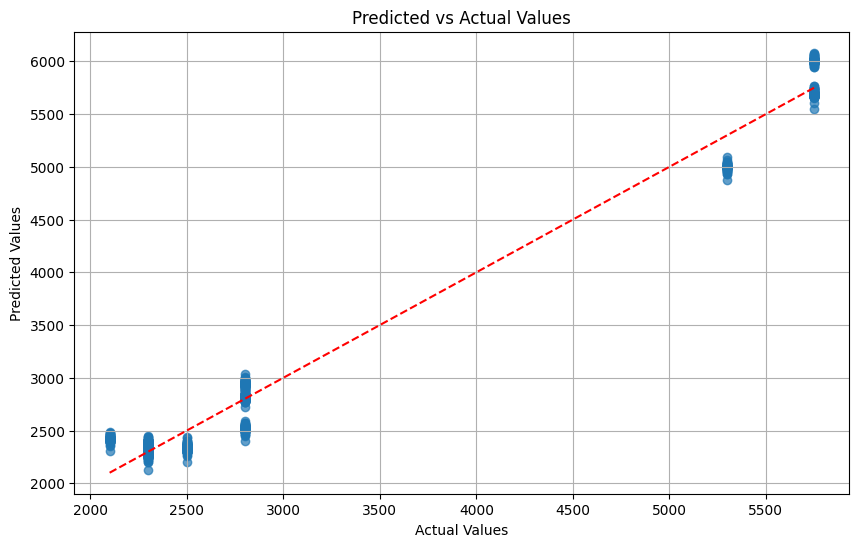

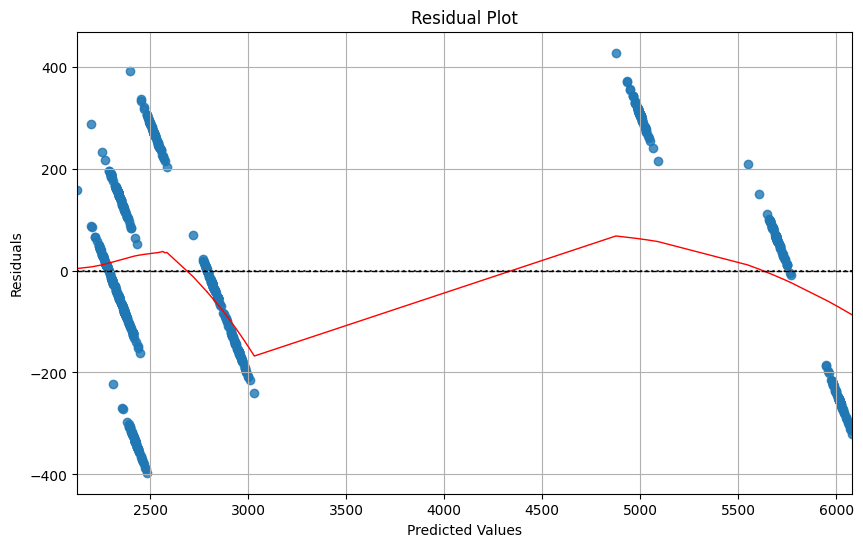

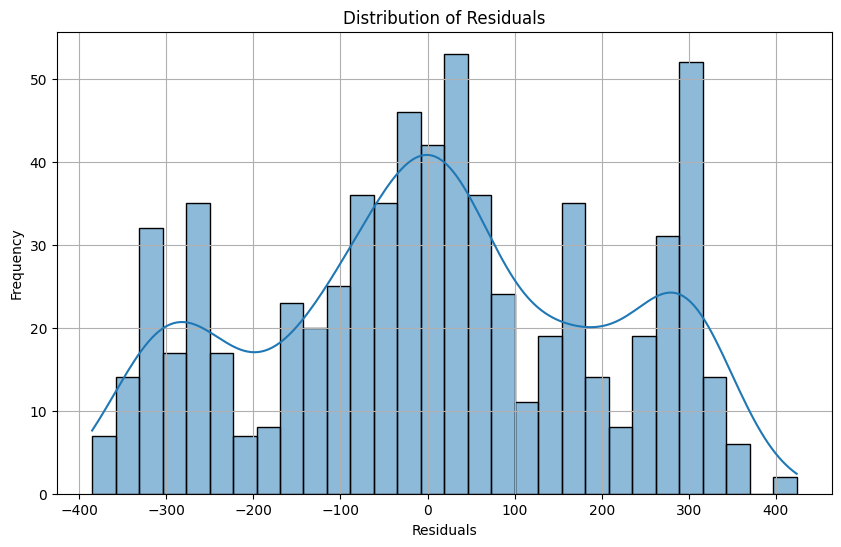

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your original dataset
file_path = '/content/agridata_updated1.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Create a copy of the DataFrame
X = df.copy()  # Make a copy of the original DataFrame
y = X.pop('modal_price_rs_quintal')  # Change this to the dependent variable you want to predict

# Drop categorical columns or encode them if necessary
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualization

# 1. Scatter Plot of Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True,
               line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, linestyle='--', color='black', lw=1)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# 3. Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [ ]:
import pandas as pd

# Load the trained model if it's saved (optional)
# from sklearn.linear_model import LinearRegression
# import joblib
# model = joblib.load('linear_regression_model.pkl')

# New input data for prediction
new_data = {
    'arrival_tonnes': [200],  # Example input for arrival_tonnes
    'min_price_rs_quintal': [800],  # Example input for min_price_rs_quintal
    'max_price_rs_quintal': [1200],  # Example input for max_price_rs_quintal
    # Add other features here based on your training data
    # ... include ALL features used during training ...
    'commodity_name_Alasande Gram': [0], # Example: Set to 1 if this commodity, 0 otherwise. Repeat for other commodities.
    'commodity_name_Almond(Badam)': [0],
    # ... add all other one-hot encoded commodity names
}

# Create a DataFrame from the new input data
input_df = pd.DataFrame(new_data)

# If you need to apply the same preprocessing steps as during training, do that here:
# For example, if you used get_dummies for categorical variables:
# input_df = pd.get_dummies(input_df, drop_first=True)

# Ensure the input DataFrame has the same number of columns as the training data
# This may require reindexing to add missing columns with default values (0)
input_df = input_df.reindex(columns=X_train.columns, fill_value=0) # Reindex to ensure all columns are present

# Make the prediction
predicted_value = model.predict(input_df)

print("Predicted Value:", predicted_value[0])

Predicted Value: -5258.172928563821


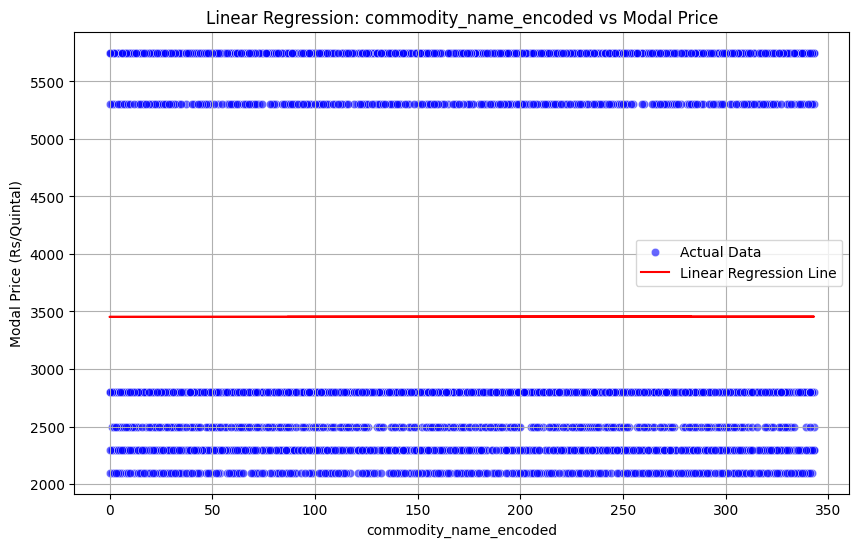

[3454.91604986 3453.95238253 3454.93984411 ... 3454.47585614 3454.45801045
 3453.75013136]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load your original dataset
file_path = '/content/train_data.csv'  # replace with your file path
df = pd.read_csv(file_path)

# Define the independent and dependent variables
X = df[['commodity_name_encoded']]  # Independent variable
y = df['modal_price_rs_quintal']  # Dependent variable

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Create predictions for the entire dataset
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['commodity_name_encoded'], y=y, color='blue', label='Actual Data', alpha=0.6)
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.title('Linear Regression: commodity_name_encoded vs Modal Price')
plt.xlabel('commodity_name_encoded')
plt.ylabel('Modal Price (Rs/Quintal)')
plt.legend()
plt.grid(True)
plt.show()
print(y_pred)
